# Generate Figure 3 Plots

This notebook uses the results obtained from running the notebooks `LFMC Scenario A.ipynb`, `LFMC Scenario B.ipynb`, and `LFMC Scenario C.ipynb` and generates a figure containing a scatter plot of the estimated LFMC versus the measured LFMC for each test sample. This is equivalent to Fig. 3 in "Live fuel moisture content estimation from MODIS: a deep learning approach" (Zhu et al., 2021).

The generated figure is saved to `results_dir`, as well as being displayed in the notebook.

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize 
from matplotlib import cm
from scipy import stats
from scipy.interpolate import interpn

from model_utils import plot_results

## Results Directory
Update this to the directory containing the results for the three scenarios

In [2]:
results_dir = r'G:\My Drive\LFMC from MODIS\Models'

## Main Code
Read the results from each scenario.

In [2]:
model_names =['Scenario_A', 'Scenario_B', 'Scenario_C']
model_dirs = [os.path.join(results_dir, m) for m in model_names]
predicts = [pd.read_csv(os.path.join(d, 'predictions.csv'), index_col=0) for d in model_dirs]
predict_stats = [pd.read_csv(os.path.join(d, 'predict_stats.csv'), index_col=0) for d in model_dirs]

[              Bias     R    R2   RMSE  ubRMSE  runTime
 base         -7.44  0.73  0.53  27.05   26.01     1.18
 best         -2.85  0.73  0.54  25.86   25.70     0.83
 merge_best10 -4.14  0.74  0.55  25.63   25.30     0.86
 merge10      -3.85  0.74  0.55  25.61   25.32     0.83
 ensemble10   -3.59  0.74  0.55  25.51   25.26     8.32,
               Bias     R    R2   RMSE  ubRMSE
 base         -3.47  0.65  0.43  28.13   27.91
 best         -2.47  0.63  0.40  29.03   28.93
 merge_best10 -3.81  0.66  0.44  28.04   27.78
 merge10      -4.19  0.66  0.44  28.05   27.74
 ensemble10   -4.09  0.67  0.44  27.86   27.56,
               Bias     R    R2   RMSE  ubRMSE  runTime
 base         -3.74  0.79  0.63  23.11   22.81     1.18
 best         -5.18  0.79  0.62  23.40   22.82     0.82
 merge_best10 -4.64  0.80  0.64  22.92   22.45     0.86
 merge10      -4.27  0.80  0.64  22.82   22.42     0.88
 ensemble10   -3.98  0.80  0.64  22.85   22.50     8.28]

### Generate the figure
By default, the results for the `merge10` model are used. Change `model_type` to any of the other models to plot these results instead. The plot colour indicates the number of samples occurring at each combination of estimated and measured LFMC (estimates are rounded to whole percentages).

##### Notes:
- Scenarios A and C use about 1/3 of the data for testing. Scenario B uses cross-validation and so all samples are in one test set, resulting in about 3 times the number of plot points, and a seemly denser clustering in the centre of the plot.
- The `vmax` variable controls the plot colouring.

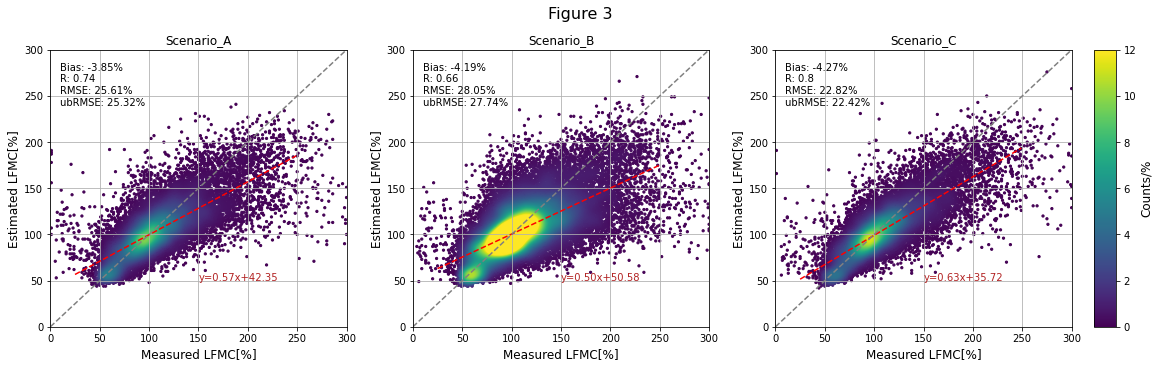

In [6]:
model_type = 'merge10'
vmax = 12
fig = plt.figure(constrained_layout=True, figsize=(16, 5))
gspec = fig.add_gridspec(ncols=3, nrows=1)
for i, m in enumerate(model_names):
    plot = fig.add_subplot(gspec[0, i])
    plot_results(m, predicts[i]['y'], predicts[i][model_type], predict_stats[i].loc[model_type], ax=plot, vmax=vmax)
cbar = fig.colorbar(cm.ScalarMappable(norm = Normalize(vmin=0, vmax=vmax)), ax=fig.axes[2], aspect=40)
cbar.ax.set_ylabel('Counts/%', fontsize=12)
_ = fig.suptitle('Figure 3', fontsize=16)

### Save the figure

In [4]:
fig.savefig(os.path.join(results_dir, "figure3.png"), dpi=300)